#Twitter Bot Detection using Machine learning

##Data collection and analysis

###Importing required libraries.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Importing Data file and analysing the datatypes of the objects 


In [25]:
tr_link = "/content/drive/MyDrive/Data/training_data_2_csv_UTF.csv"
tr_data = pd.read_csv(tr_link)
bots = tr_data[tr_data.bot == 1]
nonbots = tr_data[tr_data.bot == 0]
tr_data.dtypes

id                       float64
id_str                    object
screen_name               object
location                  object
description               object
url                       object
followers_count            int64
friends_count              int64
listed_count               int64
created_at                object
favourites_count           int64
verified                    bool
statuses_count             int64
lang                      object
status                    object
default_profile             bool
default_profile_image       bool
has_extended_profile      object
name                      object
bot                        int64
dtype: object

###Checking for NULL and Nan values.

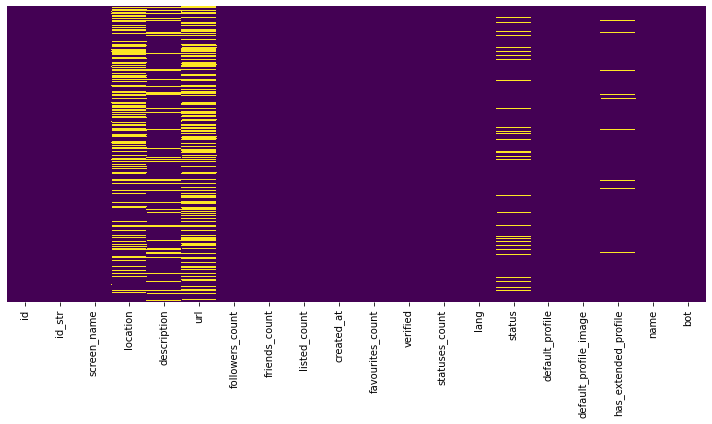

In [27]:
def get_heatmap(df):
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(tr_data)

###ploting friends vs folloewers of bot and non bot account

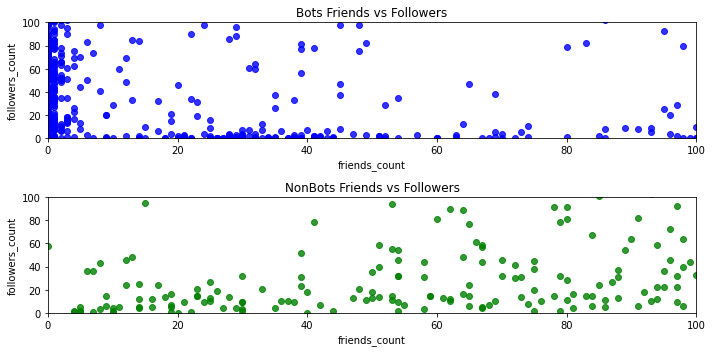

In [29]:
bots.friends_count/bots.followers_count

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers')
sns.regplot(bots.friends_count, bots.followers_count, color='blue', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('NonBots Friends vs Followers')
sns.regplot(nonbots.friends_count, nonbots.followers_count, color='green', label='NonBots')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

###Analysing the shape of from friends/followers  count for bots and non bots 

In [30]:
bots['friends_by_followers'] = bots.friends_count/bots.followers_count
print("shape of bots ",bots[bots.friends_by_followers<1].shape)

nonbots['friends_by_followers'] = nonbots.friends_count/nonbots.followers_count
print("Shape of nonbots ",nonbots[nonbots.friends_by_followers<1].shape)

shape of bots  (812, 21)
Shape of nonbots  (952, 21)


###Analysing the immbalance in data 

(504, 21)


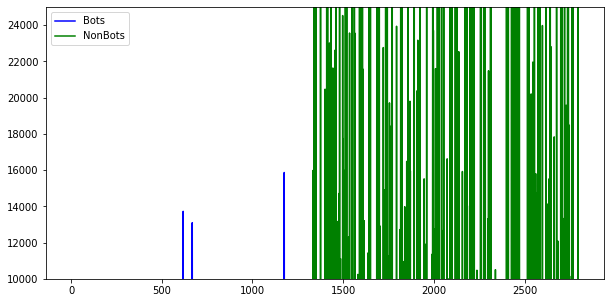

In [31]:
plt.figure(figsize=(10,5))
plt.plot(bots.listed_count, color='blue', label='Bots')
plt.plot(nonbots.listed_count, color='green', label='NonBots')
plt.legend(loc='upper left')
plt.ylim(10000,25000)
print(bots[(bots.listed_count<5)].shape)

###Checking for verified accounds and accounts with the bot in there username

In [165]:
bots_listed_count_df = bots[bots.listed_count<16000]
nonbots_listed_count_df = nonbots[nonbots.listed_count<16000]

bots_verified_df = bots_listed_count_df[bots_listed_count_df.verified==False]
bots_screenname_has_bot_df_ = bots_verified_df[(bots_verified_df.screen_name.str.contains("bot", case=False)==True)].shape

###Ploting the friends and followers  with listed count for bots and non bots 

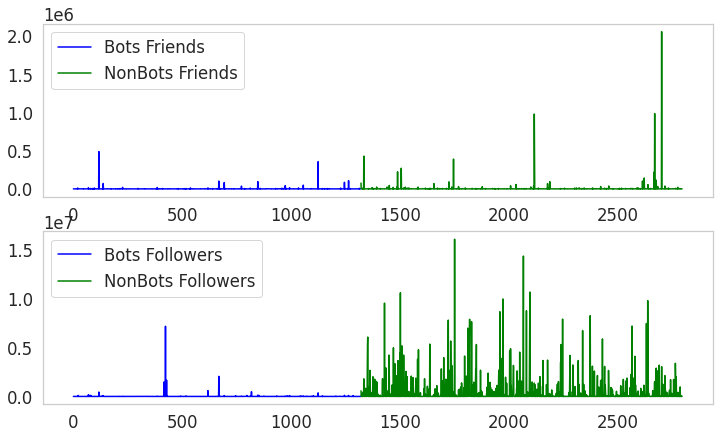

In [179]:
plt.figure(figsize=(12,7))

plt.subplot(2,1,1)
plt.plot(bots_listed_count_df.friends_count, color='blue', label='Bots Friends')
plt.plot(nonbots_listed_count_df.friends_count, color='green', label='NonBots Friends')
plt.legend(loc='upper left')

plt.subplot(2,1,2)
plt.plot(bots_listed_count_df.followers_count, color='blue', label='Bots Followers')
plt.plot(nonbots_listed_count_df.followers_count, color='green', label='NonBots Followers')
plt.legend(loc='upper left')

###Specifiing codition to extract features for bots and non bots 

condition for bots 

In [34]:
condition = (bots.screen_name.str.contains("bot", case=False)==True)|(bots.description.str.contains("bot", case=False)==True)|(bots.location.isnull())|(bots.verified==False)

bots['screen_name_binary'] = (bots.screen_name.str.contains("bot", case=False)==True)
bots['location_binary'] = (bots.location.isnull())
bots['verified_binary'] = (bots.verified==False)
bots.shape

(1321, 24)

condition for non bots 

In [35]:
condition = (nonbots.screen_name.str.contains("bot", case=False)==False)| (nonbots.description.str.contains("bot", case=False)==False) |(nonbots.location.isnull()==False)|(nonbots.verified==True)

nonbots['screen_name_binary'] = (nonbots.screen_name.str.contains("bot", case=False)==False)
nonbots['location_binary'] = (nonbots.location.isnull()==False)
nonbots['verified_binary'] = (nonbots.verified==True)

nonbots.shape

(1476, 24)

###Creating DataFrame

In [37]:
df = pd.concat([bots, nonbots])
df.shape


(2797, 24)

In [180]:
df.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,...,status,default_profile,default_profile_image,has_extended_profile,name,bot,friends_by_followers,screen_name_binary,location_binary,verified_binary
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",...,"{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston PokŽ Alert""",1,0.000000,False,False,True
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,...,NaN,True,False,False,Keri Nelson,1,349.000000,False,False,True
2,4.303727e+09,4303727112,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,...,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1,0.000000,True,True,True
3,3.063139e+09,3063139353,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,...,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,1,0.000000,False,True,True
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,...,NaN,False,False,False,lucarivera16,1,67.727273,False,False,True


###Finding corelation using spearman method

find corelation within the dataFrame

In [38]:
df.corr(method='spearman')

,id,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot,friends_by_followers,screen_name_binary,location_binary,verified_binary
id,1.000000,-0.672925,-0.402346,-0.615005,-0.439430,-0.611899,-0.451945,0.522990,0.166601,0.652131,0.270435,-0.576100,-0.228328,0.150100
followers_count,-0.672925,1.000000,0.375522,0.896126,0.457363,0.709732,0.649117,-0.496899,-0.293838,-0.468430,-0.577157,0.458213,0.189675,0.130717
friends_count,-0.402346,0.375522,1.000000,0.204403,0.641529,0.356452,0.111118,-0.296358,-0.097607,-0.483105,0.427638,0.342145,0.082692,-0.210592
listed_count,-0.615005,0.896126,0.204403,1.000000,0.349059,0.694340,0.684976,-0.447376,-0.269035,-0.318445,-0.681034,0.338698,0.188797,0.281360
favourites_count,-0.439430,0.457363,0.641529,0.349059,1.000000,0.394227,0.295108,-0.348043,-0.226956,-0.526228,0.104797,0.408864,0.120941,-0.220894
verified,-0.611899,0.709732,0.356452,0.694340,0.394227,1.000000,0.333278,-0.404650,-0.132298,-0.508555,-0.419815,0.434177,0.191922,0.346505
statuses_count,-0.451945,0.649117,0.111118,0.684976,0.295108,0.333278,1.000000,-0.375918,-0.289999,-0.089018,-0.533971,0.162213,0.105333,0.207384
default_profile,0.522990,-0.496899,-0.296358,-0.447376,-0.348043,-0.404650,-0.375918,1.000000,0.246979,0.407748,0.197929,-0.377572,-0.138378,0.072351
default_profile_image,0.166601,-0.293838,-0.097607,-0.269035,-0.226956,-0.132298,-0.289999,0.246979,1.000000,0.139669,0.190986,-0.166388,0.000596,0.033021
bot,0.652131,-0.468430,-0.483105,-0.318445,-0.526228,-0.508555,-0.089018,0.407748,0.139669,1.000000,-0.044056,-0.843429,-0.266342,0.606771


###Ploting heatmap with the colreation

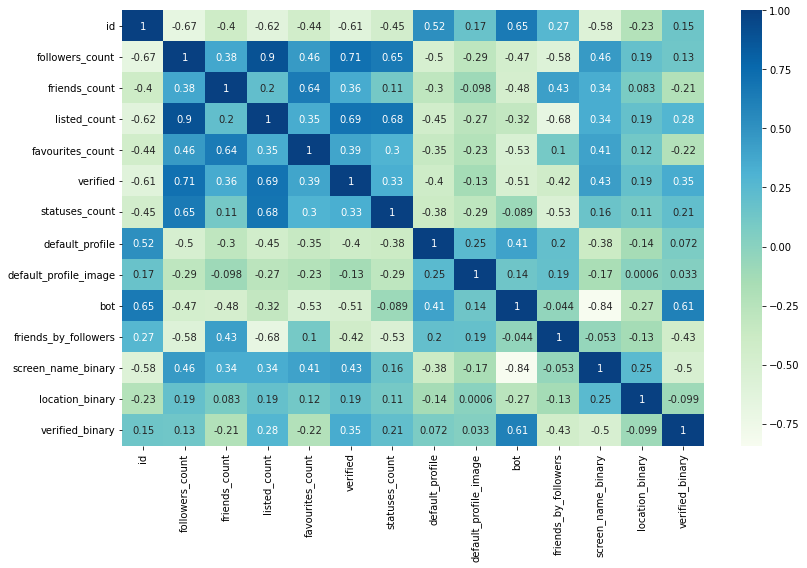

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(method='spearman'), cmap='GnBu', annot=True)
plt.tight_layout()
plt.show()

Result:
- There is no correlation between **id, statuses_count, default_profile, default_profile_image** and target variable.
- There is strong correlation between **verified, listed_count, friends_count, followers_count** and target variable.
- We cannot perform correlation for categorical attributes. So we will take **screen_name, name, description, status** into feature engineering. While use **verified, listed_count** for feature extraction.

##Importing Training Data and performing feature Engineering

In [168]:
filep = open('/content/drive/MyDrive/Data/training_data_2_csv_UTF.csv', mode = 'r', encoding = 'utf-8', errors = 'ignore')
trdata = pd.read_csv(filep)

bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'

trdata['screen_name_binary'] = trdata.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
trdata['name_binary'] = trdata.name.str.contains(bag_of_words_bot, case=False, na=False)
trdata['description_binary'] = trdata.description.str.contains(bag_of_words_bot, case=False, na=False)
trdata['status_binary'] = trdata.status.str.contains(bag_of_words_bot, case=False, na=False)
trdata['listed_count_binary'] = (trdata.listed_count>20000)==False
features = ['screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'verified', 'followers_count', 'friends_count', 'statuses_count', 'listed_count_binary', 'bot']


In [169]:
trdata.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,...,default_profile,default_profile_image,has_extended_profile,name,bot,screen_name_binary,name_binary,description_binary,status_binary,listed_count_binary
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",...,True,False,False,"""Houston PokŽ Alert""",1,True,False,False,True,True
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,...,True,False,False,Keri Nelson,1,True,False,False,False,True
2,4.303727e+09,4303727112,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,...,True,False,False,Matt Lieber Is Bot,1,True,True,True,True,True
3,3.063139e+09,3063139353,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,...,True,True,False,single cell papers,1,True,True,False,False,True
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,...,False,False,False,lucarivera16,1,False,False,True,False,True


##Training Machine Learning Models
###Decision Tree Classifier


In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

X = trdata[features].iloc[:,:-1]
y = trdata[features].iloc[:,-1]

dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

dt = dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 0.88707
Test Accuracy: 0.87857


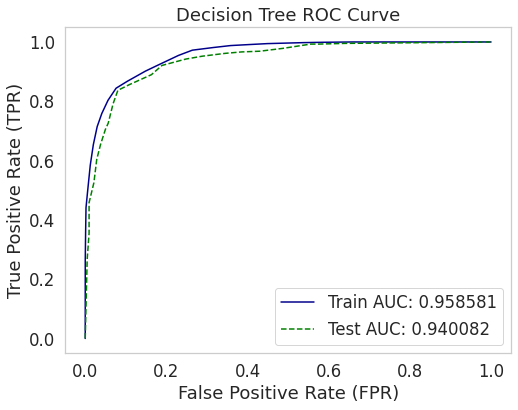

In [170]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = dt.predict_proba(X_train)
scores_test = dt.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.figure(figsize=(8,6))
plt.plot(fpr_dt_train, tpr_dt_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_dt_train, tpr_dt_train))
plt.plot(fpr_dt_test, tpr_dt_test, color='green', ls='--', label='Test AUC: %5f' %auc(fpr_dt_test, tpr_dt_test))
plt.title("Decision Tree ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

###MultiNominal NB


In [108]:
from sklearn.naive_bayes import MultinomialNB

X = trdata[features].iloc[:,:-1]
y = trdata[features].iloc[:,-1]

mnb = MultinomialNB(alpha=0.0009)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

mnb = mnb.fit(X_train, y_train)
y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)

print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 0.67961
Test Accuracy: 0.69762


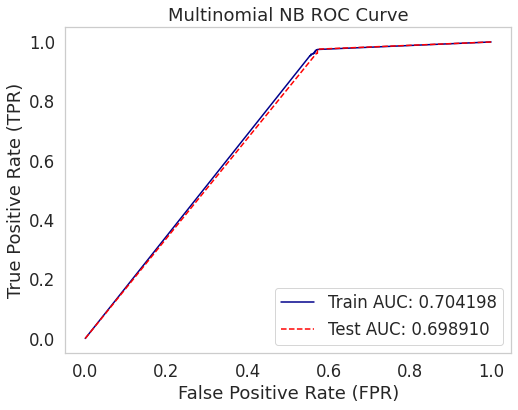

In [171]:
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = mnb.predict_proba(X_train)
scores_test = mnb.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_mnb_train, tpr_mnb_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_mnb_test, tpr_mnb_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.figure(figsize=(8,6))
plt.plot(fpr_mnb_train, tpr_mnb_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_mnb_train, tpr_mnb_train))
plt.plot(fpr_mnb_test, tpr_mnb_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_mnb_test, tpr_mnb_test))
plt.title("Multinomial NB ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

###Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

X = trdata[features].iloc[:,:-1]
y = trdata[features].iloc[:,-1]

rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rf = rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 0.87992
Test Accuracy: 0.86190


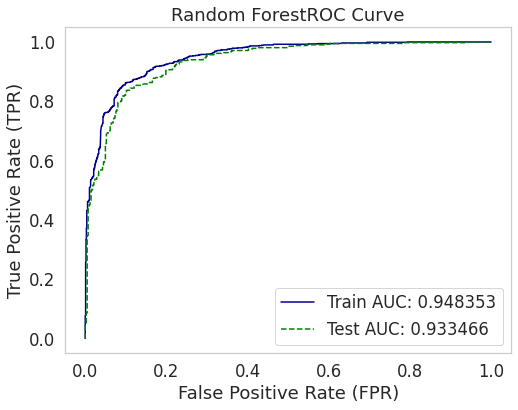

In [172]:
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = rf.predict_proba(X_train)
scores_test = rf.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.figure(figsize = (8,6))
plt.plot(fpr_rf_train, tpr_rf_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
plt.plot(fpr_rf_test, tpr_rf_test, color='green', ls='--', label='Test AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
plt.title("Random ForestROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

###Analysing all three models on ROC Curve

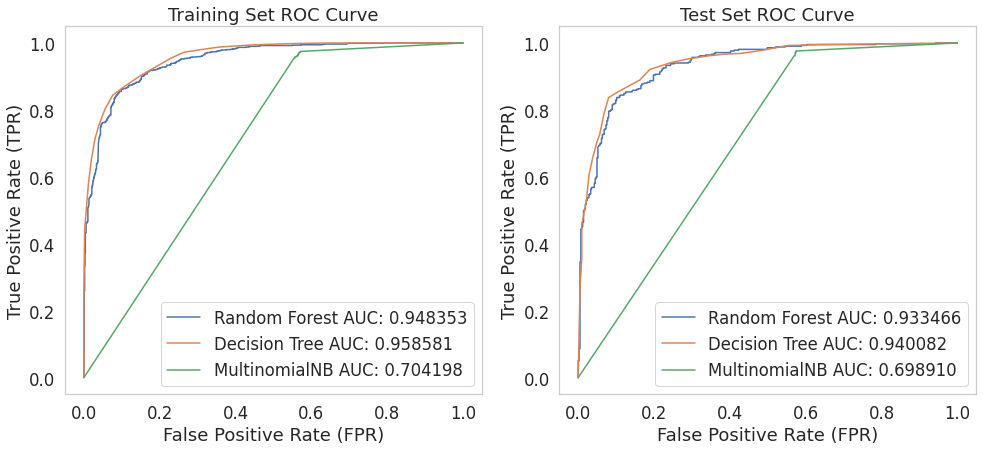

In [175]:
plt.figure(figsize = (14,12))

plt.subplot(2,2,1)
plt.plot(fpr_rf_train, tpr_rf_train, label='Random Forest AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
plt.plot(fpr_dt_train, tpr_dt_train, label='Decision Tree AUC: %5f' %auc(fpr_dt_train, tpr_dt_train))
plt.plot(fpr_mnb_train, tpr_mnb_train, label='MultinomialNB AUC: %5f' %auc(fpr_mnb_train, tpr_mnb_train))
plt.title("Training Set ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')


plt.subplot(2,2,2)
plt.plot(fpr_rf_test, tpr_rf_test, label='Random Forest AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
plt.plot(fpr_dt_test, tpr_dt_test, label='Decision Tree AUC: %5f' %auc(fpr_dt_test, tpr_dt_test))
plt.plot(fpr_mnb_test, tpr_mnb_test, label='MultinomialNB AUC: %5f' %auc(fpr_mnb_test, tpr_mnb_test))
plt.title("Test Set ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')
plt.tight_layout()

##Importing ML models 

In [51]:
import pickle as pk
Df_model = pk.dump(dt, open("df_model.pkl","wb"))
Rf_model = pk.dump(rf, open("rf_model.pkl","wb"))

##Exctracting data from twitter

In [1]:
import tweepy
import os,sys, csv, time
import pandas as pd
import numpy as np

def createOutput(data, isbot):
    header = ['id', 'id_str', 'screen_name', 'location', 'description', 'url',
                'followers_count', 'friends_count', 'listed_count', 'created_at',
                'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
                'default_profile','default_profile_image', 'has_extended_profile',
                'name']
    d = {}
    for key in header:
        if key not in data.keys():
            d[key] = ""
        elif key == 'status':
            d[key] = str(data[key])
        else:
            d[key] = data[key]

    df = pd.DataFrame(d, columns= header, index=np.arange(1))
    df['bot'] = isbot
    return df



start=time.time()
#Twitter credentials
consumer_key='WbKykNQ1Mvb6MBaTBdZ1NQnD0'
consumer_secret='586yF79Ughv1XJhQiXkOENGKlA5C0mc1QVu72XX0IhUNJfsAHE'
access_key = '1439608926161420298-JNVXmSocW26qdndxQovnD3fP1NSZM8'
access_secret = 'KdBRzUQRgVrv5Yfy3QLe74Xtfy8CQ3IgCVxKB8qHlvFvA'



auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key,access_secret)
api = tweepy.API(auth)



def get_bots_list():
    bots_list = []
    for bots in tweepy.Cursor(api.list_members, '01101O10', 'bot-list').items():
        bots_list.append (bots._json['screen_name'])
    bots_list
    return bots_list[:250]

def real_users_list():
    real_users = []
    for users in tweepy.Cursor(api.list_members, 'Scobleizer','computer-vision').items():
        real_users.append (users._json['screen_name'])
    real_users
    return real_users[:300]


def get_user_list():
    user_list = get_bots_list() + real_users_list()
    filename = 'bots_nonbots_output.csv'
    return user_list, filename
    print ("Gathering real-time data Using Twitter API.")

user_list, filename = get_user_list()

df = pd.DataFrame()
for i,users in enumerate(user_list, start=1):
    isbot=0
    if(i<=250):
        isbot=1
    data = api.get_user(users)._json
    data_df1 = createOutput(data, isbot)
    df = pd.concat([data_df1, df], axis= 0, ignore_index = True)

df.to_csv(filename, encoding='utf-8')
print ("All records are saved to csv. \nDuration: "+str(time.time()-start)+" seconds.")

All records are saved to csv. 
Duration: 119.71740341186523 seconds.


###Importing the extracted data file

In [147]:
t_data = pd.read_csv("/content/bots_nonbots_output.csv")

test_data = t_data.copy()
test_data.pop("bot")

0


###Vectorizing using Bag of Words

In [150]:
bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'

test_data['screen_name_binary'] = test_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
test_data['name_binary'] = test_data.name.str.contains(bag_of_words_bot, case=False, na=False)
test_data['description_binary'] = test_data.description.str.contains(bag_of_words_bot, case=False, na=False)
test_data['status_binary'] = test_data.status.str.contains(bag_of_words_bot, case=False, na=False)
test_data['listed_count_binary'] = (test_data.listed_count>20000)==False
features = ['screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'verified', 'followers_count', 'friends_count', 'statuses_count', 'listed_count_binary']


###Testing the Decision Tree Classifier Model

In [159]:
df_model = pk.load(open("df_model.pkl",'rb'))
X = test_data[features].iloc[:,:]
res = df_model.predict(X)
cop = [t_data['bot'][x] for x in range(len(X)) ]

print("Accuracy: ",accuracy_score(res,cop)*100)

Acc:  80.36363636363636


###Testing Random Forest Model

In [160]:
rf_model = pk.load(open("rf_model.pkl","rb"))
X = test_data[features].iloc[:,:]
ref = rf_model.predict(X)
print("Accuracy: ", accuracy_score(ref, cop)*100)

Acc 81.81818181818183


#Bot Detector for Twitter

###Specifiing all the Tokens and seting up API Authentication

In [178]:
import tweepy 

consumer_key='WbKykNQ1Mvb6MBaTBdZ1NQnD0'
consumer_secret='586yF79Ughv1XJhQiXkOENGKlA5C0mc1QVu72XX0IhUNJfsAHE'
access_key = '1439608926161420298-JNVXmSocW26qdndxQovnD3fP1NSZM8'
access_secret = 'KdBRzUQRgVrv5Yfy3QLe74Xtfy8CQ3IgCVxKB8qHlvFvA'



auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key,access_secret)
api = tweepy.API(auth)

###Main 

In [181]:
sc_name = input("Enter user_name: ")

try:
  user = api.get_user(sc_name)._json
except:
  print("User Not Found\nTry searching with a differnt user name")

def process(data):
    header = ['id', 'id_str', 'screen_name', 'location', 'description', 'url',
                'followers_count', 'friends_count', 'listed_count', 'created_at',
                'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
                'default_profile','default_profile_image', 'has_extended_profile',
                'name']
    d = {}
    for key in header:
        if key not in data.keys():
            d[key] = ""
        elif key == 'status':
            d[key] = str(data[key])
        else:
            d[key] = data[key]

    df = pd.DataFrame(d, columns= header, index=np.arange(1))
    return df


d = process(user)

bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon|BOT|Bot' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'

d['screen_name_binary'] = d.screen_name.str.contains(bag_of_words_bot, case=0, na=0)
d['name_binary'] = d.name.str.contains(bag_of_words_bot, case=0, na=0)
d['description_binary'] = d.description.str.contains(bag_of_words_bot, case=0, na=0)
d['status_binary'] = d.status.str.contains(bag_of_words_bot, case=0, na=0)
d['listed_count_binary'] = (d.listed_count>20000)==0


d.head()

def feat():
  snb = d['screen_name_binary'][0]
  nb = d['name_binary'][0]
  db = d['description_binary'][0]
  sb = d['status_binary'][0]
  lcb = d['listed_count_binary'][0]
  v =  d['verified'][0]
  fc = d['followers_count'][0]
  fdc = d['friends_count'][0]
  sc = d['statuses_count'][0]
  li = [snb,nb,db,sb,v,fc,fdc,sc,lcb]
  return li


res = rf_model.predict([feat()])
if(res == 0):
  print(d['screen_name'][0],"is a real account")
else:
  print(d['screen_name'][0],"is a Bot account")

Enter user_name: Elon Musk 
User Not Found
Try searching with a differnt user name
NyanCat is a real account
